In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

%matplotlib inline

In [2]:
df = pd.read_csv("fire_nrt_V1_96617.csv")
df

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


# Task 1: Density Plots

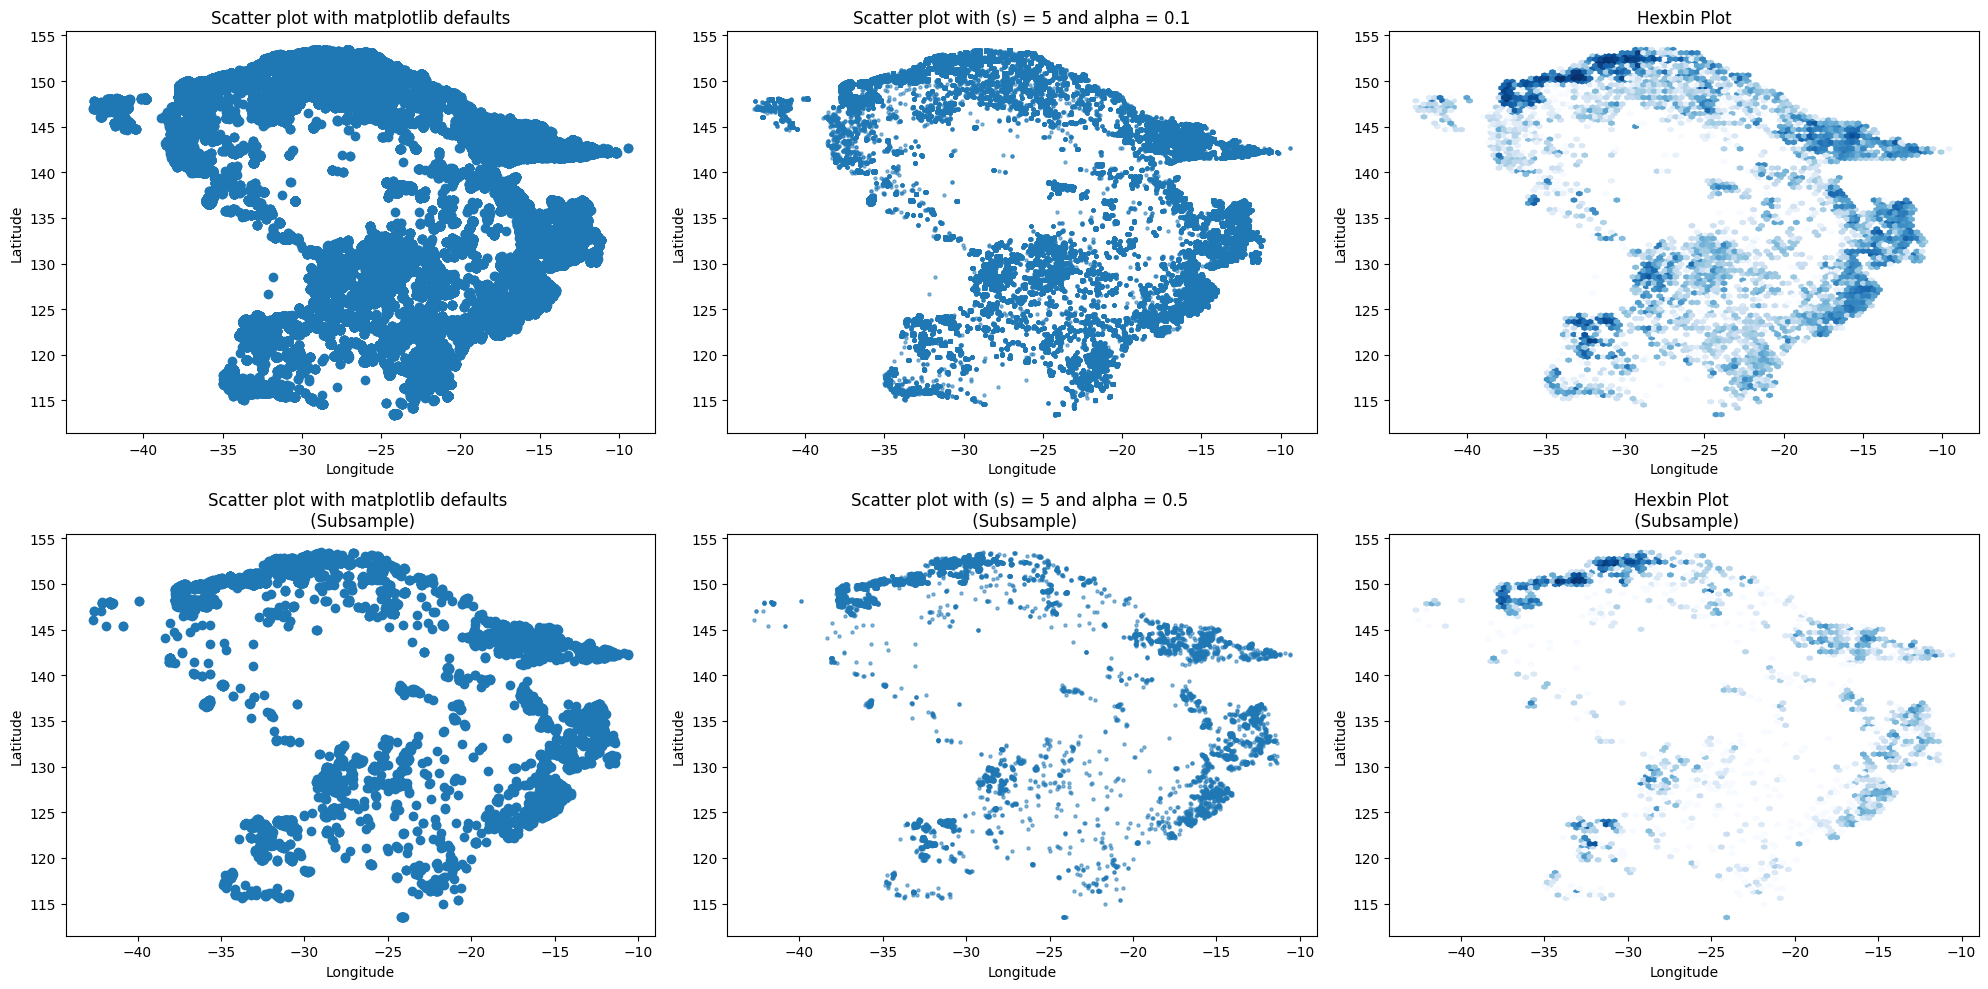

In [3]:
x = df['latitude']
y = df['longitude']

x_sample = df['latitude'].sample(10000, random_state=42)
y_sample = df['longitude'].sample(10000, random_state=42) 

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes[0,0].scatter(x, y)
axes[0,1].scatter(x, y, alpha=0.5, s=5)
axes[0,2].hexbin(x, y, bins = 'log', cmap='Blues')
axes[1,0].scatter(x_sample, y_sample)
axes[1,1].scatter(x_sample, y_sample, alpha=0.5, s=5)
axes[1,2].hexbin(x_sample, y_sample, bins = 'log', cmap='Blues')

axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title("Scatter plot with matplotlib defaults")
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title("Scatter plot with matplotlib defaults \n (Subsample)")
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
axes[0,1].set_title("Scatter plot with (s) = 5 and alpha = 0.1")
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title("Scatter plot with (s) = 5 and alpha = 0.5 \n (Subsample)")
axes[0,2].set_xlabel('Longitude')
axes[0,2].set_ylabel('Latitude')
axes[0,2].set_title("Hexbin Plot")
axes[1,2].set_xlabel('Longitude')
axes[1,2].set_ylabel('Latitude')
axes[1,2].set_title("Hexbin Plot \n (Subsample)")

plt.tight_layout()
plt.show()

# Task 2: Visualizing class membership 

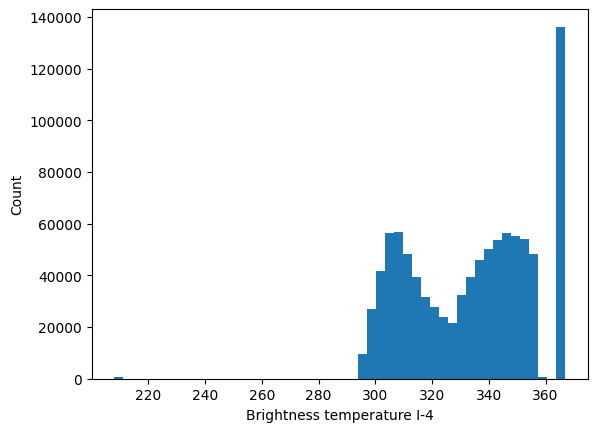

367.0


In [4]:
a = df["bright_ti4"]

plt.hist(a,bins=50)
plt.xlabel('Brightness temperature I-4')
plt.ylabel('Count')
plt.show()

unique_temp_i4 = a[df["bright_ti4"]>=360].unique()[0]
print(unique_temp_i4)

In [5]:
data_saturated = df.loc[df["bright_ti4"] == unique_temp_i4]
data_not_saturated = df.loc[df["bright_ti4"] != unique_temp_i4]

long_saturated = data_saturated["longitude"]
lat_saturated = data_saturated["latitude"]

long_not_saturated = data_not_saturated["longitude"]
lat_not_saturated = data_not_saturated["latitude"]

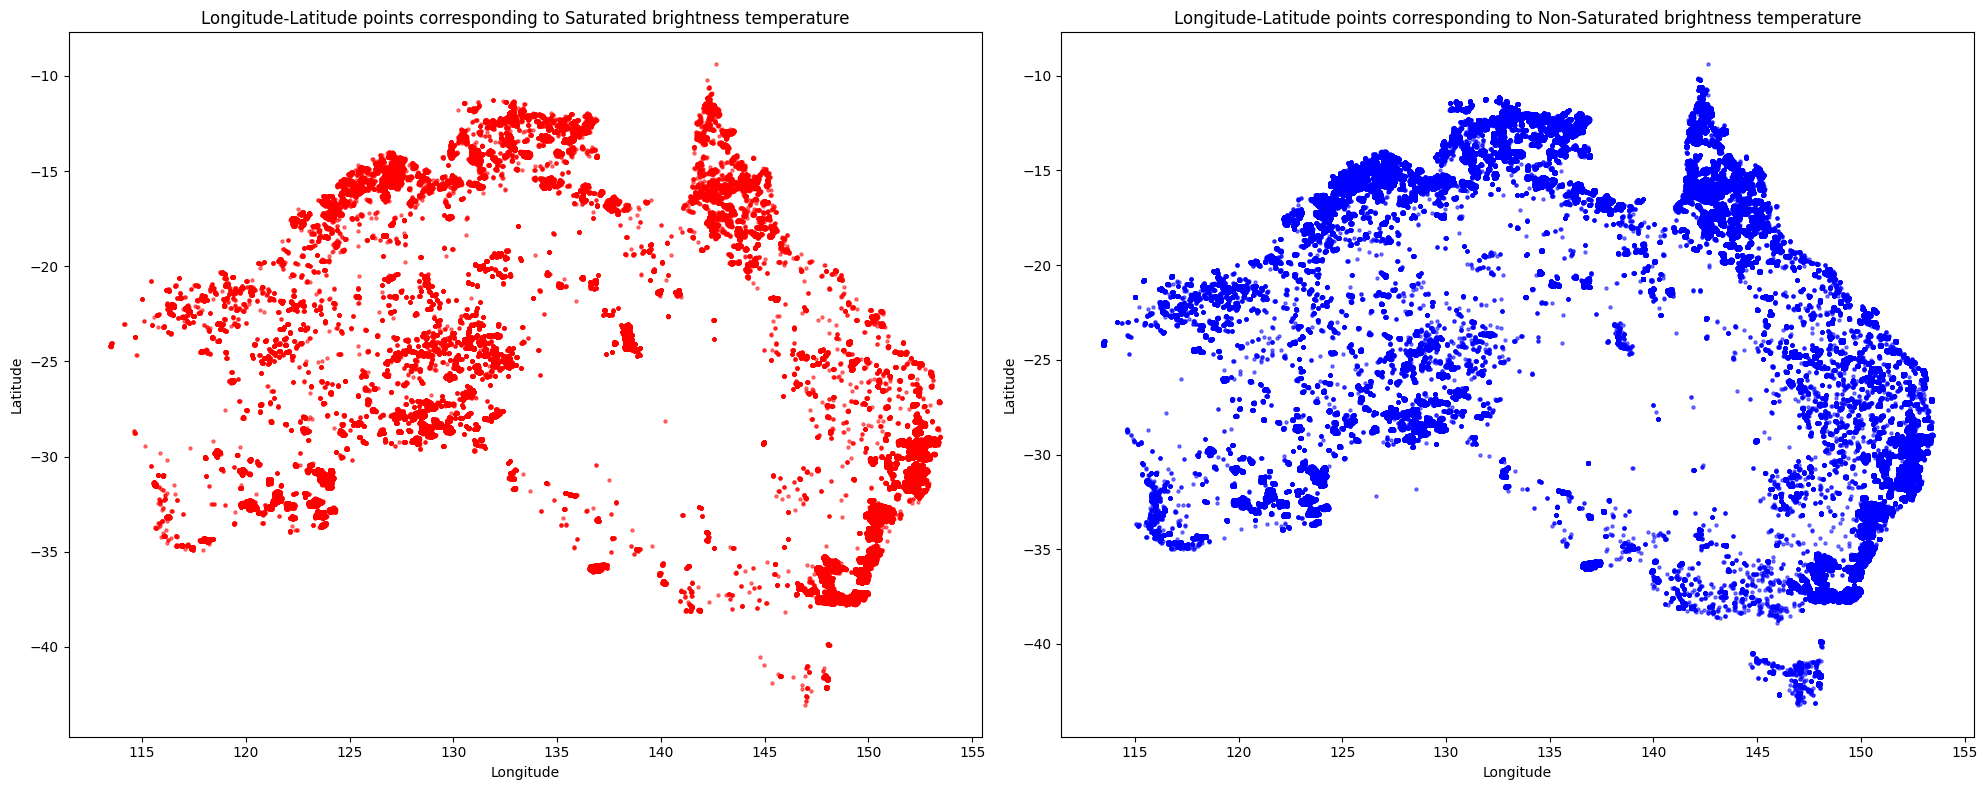

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].scatter(long_saturated, lat_saturated, s=5, alpha = 0.5, color = "red")
ax[1].scatter(long_not_saturated, lat_not_saturated, s=5, alpha = 0.5, color = "blue")

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

ax[0].set_title("Longitude-Latitude points corresponding to Saturated brightness temperature")
ax[1].set_title("Longitude-Latitude points corresponding to Non-Saturated brightness temperature")

plt.tight_layout()
plt.show()

C:\Users\Silvia\AppData\Local\Temp\ipykernel_17964\1758753841.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:
C:\Users\Silvia\AppData\Local\Temp\ipykernel_17964\1758753841.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


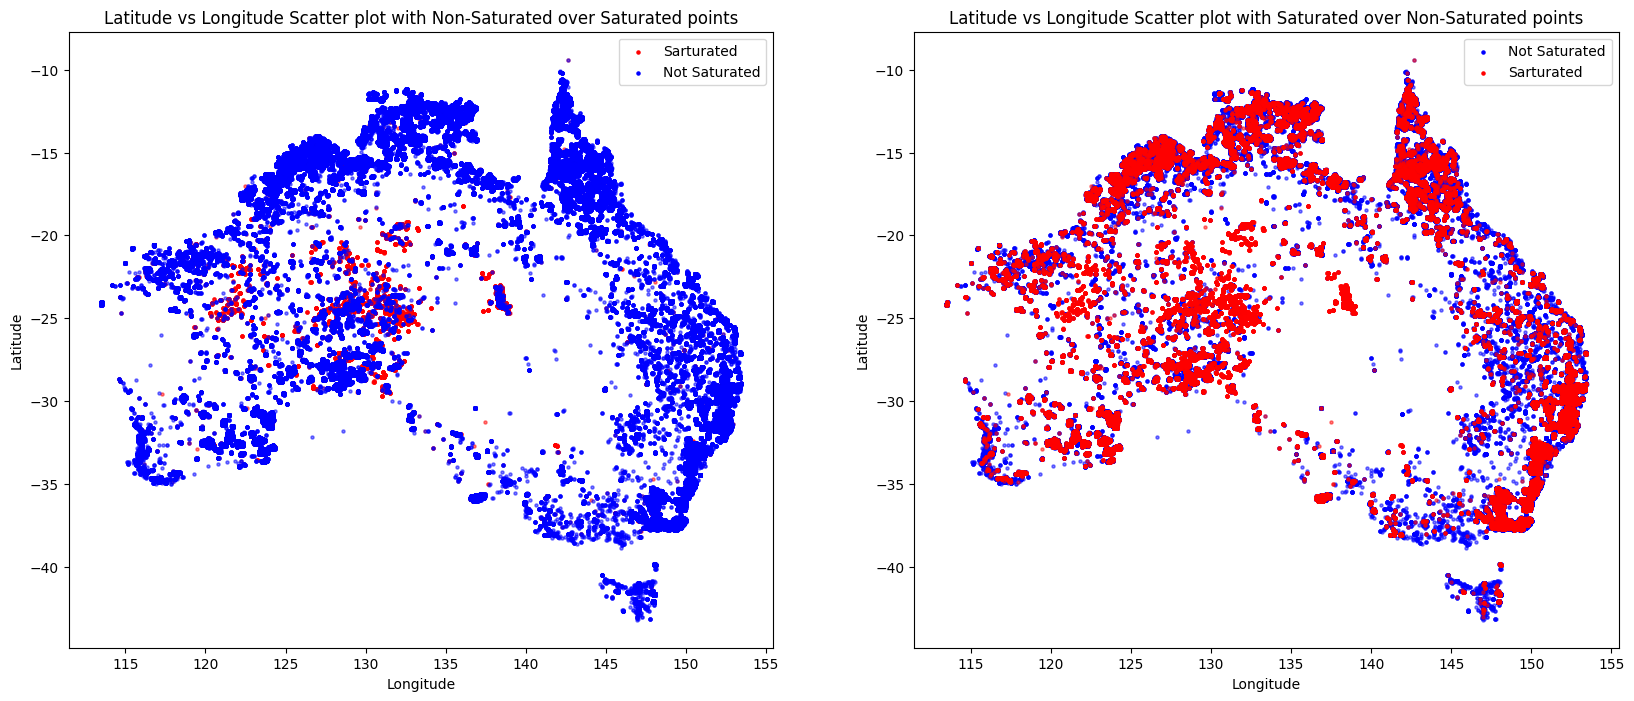

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].scatter(long_saturated, lat_saturated, s=5, alpha = 0.5, color = "red" , label = "Sarturated")
ax[0].scatter(long_not_saturated, lat_not_saturated, s=5, alpha = 0.5, color = "blue", label = "Not Saturated")
leg = ax[0].legend()
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax[1].scatter(long_not_saturated, lat_not_saturated, s=5, alpha = 0.5, color = "blue", label = "Not Saturated")
ax[1].scatter(long_saturated, lat_saturated, s=5, alpha = 0.5, color = "red" , label = "Sarturated")
leg = ax[1].legend()
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax[0].set_title("Latitude vs Longitude Scatter plot with Non-Saturated over Saturated points")
ax[1].set_title("Latitude vs Longitude Scatter plot with Saturated over Non-Saturated points")
    
plt.show()

In [13]:
nbins = 50

x_saturated, y_saturated = long_saturated, lat_saturated
k_saturated = gaussian_kde([x_saturated, y_saturated])
xi_saturated, yi_saturated = np.mgrid[x_saturated.min():x_saturated.max():nbins*1j,
                                       y_saturated.min():y_saturated.max():nbins*1j]
zi_saturated = k_saturated(np.vstack([xi_saturated.flatten(), yi_saturated.flatten()]))

x_not_saturated, y_not_saturated = long_not_saturated, lat_not_saturated
k_not_saturated = gaussian_kde([x_not_saturated, y_not_saturated])
xi_not_saturated, yi_not_saturated = np.mgrid[x_not_saturated.min():x_not_saturated.max():nbins*1j,
                                               y_not_saturated.min():y_not_saturated.max():nbins*1j]
zi_not_saturated = k_not_saturated(np.vstack([xi_not_saturated.flatten(), yi_not_saturated.flatten()]))

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xi_saturated, yi_saturated, zi_saturated.reshape(xi_saturated.shape), cmap='viridis')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Density')
ax1.set_title("Saturated Brightness Temperature")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xi_not_saturated, yi_not_saturated, zi_not_saturated.reshape(xi_not_saturated.shape), cmap='viridis')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Density')
ax2.set_title("Non-Saturated Brightness Temperature")

plt.show()

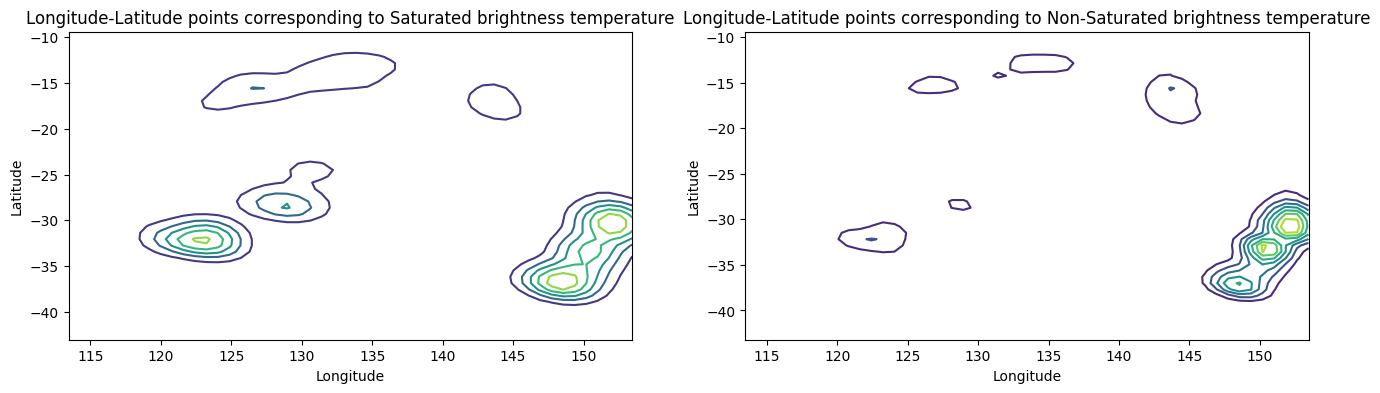

In [ ]:
nbins = 50

x_saturated, y_saturated = long_saturated, lat_saturated
k_saturated = gaussian_kde([x_saturated, y_saturated])
xi_saturated, yi_saturated = np.mgrid[x_saturated.min():x_saturated.max():nbins*1j,
                                       y_saturated.min():y_saturated.max():nbins*1j]
zi_saturated = k_saturated(np.vstack([xi_saturated.flatten(), yi_saturated.flatten()]))

x_not_saturated, y_not_saturated = long_not_saturated, lat_not_saturated
k_not_saturated = gaussian_kde([x_not_saturated, y_not_saturated])
xi_not_saturated, yi_not_saturated = np.mgrid[x_not_saturated.min():x_not_saturated.max():nbins*1j,
                                               y_not_saturated.min():y_not_saturated.max():nbins*1j]
zi_not_saturated = k_not_saturated(np.vstack([xi_not_saturated.flatten(), yi_not_saturated.flatten()]))

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].contour(xi_saturated, yi_saturated, zi_saturated.reshape(xi_saturated.shape))
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
 
ax[1].contour(xi_not_saturated, yi_not_saturated, zi_not_saturated.reshape(xi_not_saturated.shape))
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

ax[0].set_title("Longitude-Latitude points corresponding to Saturated brightness temperature")
ax[1].set_title("Longitude-Latitude points corresponding to Non-Saturated brightness temperature")

plt.show()

# dabl

In [8]:
import dabl

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='longitude', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.11E-01'}, xlabel='latitude', ylabel='longitude'>]],
       dtype=object),
 None]

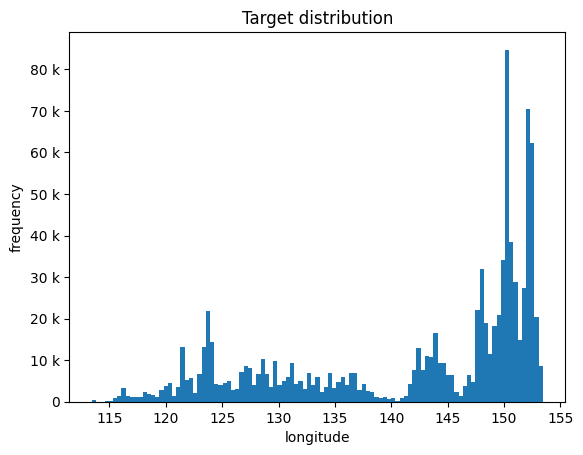

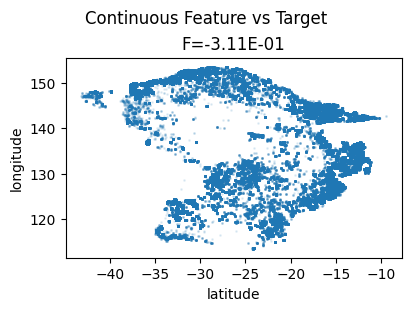

In [9]:
dabl.plot(x, y)